## 1.Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import neattext.functions as nfx
import warnings
# Load ML Pkgs
# Estimators
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## 2.Load Dataset

In [3]:
train = pd.read_table("training_set.txt")
dev = pd.read_table("dev_set.txt")
#test = pd.read_table("test_set.txt")

In [4]:
train.head(5)

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1


In [5]:
train.shape

(14000, 2)

In [6]:
train.dtypes

sentence    object
emotion      int64
dtype: object

In [7]:
dev.head()

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1


## 3.Preprocessing The Dataset

In [9]:
#emotion_Level= train["emotion"]

In [10]:
'''def emotionLevel(emotionInt):

    return {
            1: 'Anger',
            2: 'Anticipation',
            3: 'Disgust',
            4: 'Fear',
            5: 'Joy',
            6: 'Sadness',
            7: 'Surprise',
            8: 'Trust'
    }[emotionInt]

emotion_Level= emotion_Level.map(lambda x:emotionLevel(x))'''

In [11]:
#train['Emotion Level'] = emotion_Level
#train.drop('emotion',inplace=True, axis=1)

In [8]:
train.head(10)

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1
5,You tell him to take care of you .,8
6,I hope so .,4
7,Why do you want to shut me out in the cold lik...,6
8,"You taught me a lesson , man .",8
9,I'll do everything I can to make a success of ...,2


In [9]:
train.isnull().sum()

sentence    0
emotion     0
dtype: int64

In [11]:
#train['Emotion Level'].value_counts()

In [12]:
'''emotion_dev = dev['emotion']
emotion_dev = emotion_dev.map(lambda x:emotionLevel(x))
dev['Emotion Level'] = emotion_dev
dev.drop('emotion',inplace=True, axis=1)'''

"emotion_dev = dev['emotion']\nemotion_dev = emotion_dev.map(lambda x:emotionLevel(x))\ndev['Emotion Level'] = emotion_dev\ndev.drop('emotion',inplace=True, axis=1)"

In [13]:
dev.head(10)

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1
5,"Next time you try that , I'll forget that you'...",3
6,"I said , [PERSON] , you're already married .",7
7,"Maybe if I stuck him in a giant anthill , that...",1
8,"[PERSON] , he's been stripped .",4
9,Happy may have hit on something tremendous here .,4


In [14]:
# Fetch wordcount for each sentence
train['word_count'] = train['sentence'].apply(lambda x: len(str(x).split(" ")))
train[['sentence','word_count']].head()

,sentence,word_count
0,I'm too old to be traded in .,8
1,Mother said you could always tell a lady by he...,12
2,I always said I'd leave off when the time came .,11
3,He'll be safe with me .,6
4,Lay off .,3


In [15]:
train.word_count.describe()

count    14000.000000
mean         9.028571
std          5.075546
min          1.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         63.000000
Name: word_count, dtype: float64

In [16]:
all_words = ' '.join(train['sentence']).split()

In [17]:
# Count all words 
freq = pd.Series(all_words).value_counts()

In [18]:
freq[:25]

.           10600
,            5738
you          3502
I            3208
to           2862
the          2703
?            2696
a            2320
!            1608
[PERSON]     1386
of           1358
and          1266
me           1195
it           1193
that         1156
in           1083
You           950
is            902
for           847
be            761
this          757
I'm           738
have          727
your          690
my            678
dtype: int64

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isha2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

count = 0
for word in freq.index[:30]:
    if word in stopwords:
        count += 1
        
count

21

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

In [22]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isha2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isha2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from tqdm import tqdm_notebook as tqdm
def preprocessing(dataframe):
    
    processed_corpus = []
    stop_words = set(stopwords.words("english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['sentence'].iloc[i]
        
        # Remove tags
        text = BeautifulSoup(text).get_text()
        
        # Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convert to lowercase
        text = text.lower()        
        
        # Convert to list from string
        text = text.split()

        # Lemmatization
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
        
    return processed_corpus

In [24]:
cleaned_documents = preprocessing(train)

  0%|          | 0/14000 [00:00<?, ?it/s]

In [25]:
cleaned_documents

['old traded',
 'mother said could always tell lady hand',
 'always said leave time came',
 'safe',
 'lay',
 'tell take care',
 'hope',
 'want shut cold like',
 'taught lesson man',
 'everything make success',
 'worth',
 'hope never wake',
 'alright work',
 'flo parent sharing',
 'look like drunk',
 'primitive',
 'hello never ever pick phone',
 'person could word',
 'resigning senior partnership day happened happened asking',
 'ok',
 'sit try waste time',
 'find someone type',
 'nice',
 'time update program would like hear one',
 'lost another man bastard think funny',
 'hope know',
 'like child',
 'let see',
 'tell happy',
 'fine',
 'good game tonight guy',
 'terribly love',
 'told thing protect child',
 'even sure others existed',
 'beginning realize maybe public know public relation',
 'need',
 'opera start hour later tonight account parade',
 'listen buddy getting pretty easy',
 'mr person wonderful teacher',
 'think worry one',
 'got yeah think',
 'need rush hour rambos',
 'afraid

In [26]:
train['Cleaned Documents'] = cleaned_documents

In [28]:
train.head()

,sentence,emotion,word_count,Cleaned Documents
0,I'm too old to be traded in .,6,8,old traded
1,Mother said you could always tell a lady by he...,8,12,mother said could always tell lady hand
2,I always said I'd leave off when the time came .,6,11,always said leave time came
3,He'll be safe with me .,2,6,safe
4,Lay off .,1,3,lay


In [29]:
# Fetch wordcount for each sentence
dev['word_count'] = dev['sentence'].apply(lambda x: len(str(x).split(" ")))
dev[['sentence','word_count']].head()

,sentence,word_count
0,What happens to the gold in our safe ?,9
1,Natural to get cold feet .,6
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,17
4,Did you think we don't know about your affair ...,14


In [30]:
dev.word_count.describe()

count    1000.000000
mean        8.714000
std         4.507829
min         2.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        33.000000
Name: word_count, dtype: float64

In [31]:
all_words = ' '.join(dev['sentence']).split()

In [32]:
freq = pd.Series(all_words).value_counts()

In [33]:
freq[:25]

.           734
,           380
I           238
you         234
to          223
?           211
the         187
a           160
!           120
[PERSON]    101
of          101
it           99
me           76
You          75
and          75
in           72
that         71
is           67
for          61
be           56
do           53
I'm          49
this         47
with         45
not          44
dtype: int64

In [34]:
cleaned_documents = preprocessing(dev)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [35]:
cleaned_documents

['happens gold safe',
 'natural get cold foot',
 'lucky',
 'little anxious get whoop et as',
 'think know affair government official',
 'next time try forget woman',
 'said person already married',
 'maybe stuck giant anthill would loosen tongue',
 'person stripped',
 'happy may hit something tremendous',
 'hey person',
 'mine left',
 'fucking die fuck',
 'take care',
 'let go see cousin',
 'well way trying understand',
 'hephaestus',
 '',
 'think idiot',
 'tell truth location frightens',
 'look great see okay',
 'well feeling great',
 'want talk face face',
 'meaning monster ya mate',
 'changed change back',
 'technology',
 'oh delicious',
 'helicopter hit',
 'got room booked whole morning',
 'want tell something',
 'get tomorrow',
 'least say dinner right',
 'better',
 'convention anything happen',
 'hit hard',
 'got messed bro',
 'look',
 'old yellowstain flattered',
 'auryn help',
 'march tonight',
 'got headache person',
 'careful child',
 'neither made cut',
 'even know',
 'alrig

In [36]:
dev['Cleaned Documents'] = cleaned_documents

In [37]:
dev.head()

,sentence,emotion,word_count,Cleaned Documents
0,What happens to the gold in our safe ?,4,9,happens gold safe
1,Natural to get cold feet .,8,6,natural get cold foot
2,"Not very lucky , is he ?",7,7,lucky
3,I'm just a little anxious to get up there and ...,2,17,little anxious get whoop et as
4,Did you think we don't know about your affair ...,1,14,think know affair government official


In [38]:
'''plt.figure(figsize=(20,10))
sns.countplot(x='Emotion Level', data = dev)
plt.show()'''

"plt.figure(figsize=(20,10))\nsns.countplot(x='Emotion Level', data = dev)\nplt.show()"

In [39]:
dev.head(1)

,sentence,emotion,word_count,Cleaned Documents
0,What happens to the gold in our safe ?,4,9,happens gold safe


In [40]:
train.head(1)

,sentence,emotion,word_count,Cleaned Documents
0,I'm too old to be traded in .,6,8,old traded


#  4.Apply Machine learning models

+ Naïve Bayes
+ Logistic Regression
+ SVC
+ Linear SVC
+ Random Forest Classifier
+ Decision Tree Classifier

##   4.1. Naïve Bayes 

In [41]:
Xfeatures = train['Cleaned Documents']

In [42]:
ylabels = train['emotion']

In [43]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [44]:
#cv.get_feature_names()

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.0714,random_state=42)

In [46]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [47]:
nv_model.score(X_test, y_test)

0.347

## 4.1(a)dev Set Prediction  

In [48]:
dev_data = dev['Cleaned Documents']

In [49]:
vect = cv.transform(dev_data)

In [50]:
y_pred_for_nv= nv_model.predict(vect)

In [51]:
#y_pred_for_nv

In [52]:
nv_model.predict_proba(vect)

array([[0.06354854, 0.15342049, 0.09099773, ..., 0.06638237, 0.01875059,
        0.37183962],
       [0.41235649, 0.10437473, 0.05189272, ..., 0.10410166, 0.02834037,
        0.085043  ],
       [0.15364253, 0.13029808, 0.04761775, ..., 0.05109078, 0.09741227,
        0.13275238],
       ...,
       [0.49238452, 0.15509803, 0.07848131, ..., 0.04678077, 0.0445973 ,
        0.07293206],
       [0.06574644, 0.23234876, 0.11803872, ..., 0.14184633, 0.08651571,
        0.15573897],
       [0.47676414, 0.04009138, 0.0042033 , ..., 0.01339058, 0.02473862,
        0.05379083]])

## 4.1(b) Model Evaluation 

In [53]:
print(classification_report(dev['emotion'], y_pred_for_nv))

              precision    recall  f1-score   support

           1       0.32      0.67      0.43       211
           2       0.35      0.39      0.37       170
           3       0.09      0.03      0.04        77
           4       0.40      0.18      0.25       104
           5       0.42      0.36      0.39        97
           6       0.31      0.18      0.23        87
           7       0.40      0.08      0.14        96
           8       0.37      0.34      0.35       158

    accuracy                           0.34      1000
   macro avg       0.33      0.28      0.28      1000
weighted avg       0.34      0.34      0.31      1000



## 4.2. Logistic Regression 

In [54]:
Xfeatures = train['Cleaned Documents']
ylabels = train['emotion']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.0714,random_state=42)

In [56]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [57]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [58]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [59]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.357

## 4.2(a)dev Set Prediction  

In [60]:
dev_data = dev['Cleaned Documents']

In [61]:
y_pred_for_lr = pipe_lr.predict(dev_data)

In [62]:
#y_pred_for_lr

In [63]:
# Prediction Prob
pipe_lr.predict_proba(dev_data)

array([[0.04065254, 0.22196298, 0.08563792, ..., 0.06297812, 0.03011777,
        0.23586524],
       [0.2933317 , 0.05357826, 0.06228129, ..., 0.17050553, 0.03993948,
        0.12284339],
       [0.13371383, 0.09858545, 0.03658056, ..., 0.04614224, 0.11059248,
        0.08202039],
       ...,
       [0.44937713, 0.15510439, 0.07184807, ..., 0.05624947, 0.08403075,
        0.06742404],
       [0.06665955, 0.09613275, 0.13975601, ..., 0.13284066, 0.11653637,
        0.15345991],
       [0.11653311, 0.02131349, 0.01362134, ..., 0.01991922, 0.07359784,
        0.03357907]])

In [64]:
pipe_lr.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

## 4.2(b) Model Evaluation 

In [65]:
print(classification_report(dev['emotion'], y_pred_for_lr))

              precision    recall  f1-score   support

           1       0.34      0.56      0.42       211
           2       0.39      0.41      0.40       170
           3       0.24      0.14      0.18        77
           4       0.36      0.25      0.29       104
           5       0.39      0.39      0.39        97
           6       0.26      0.20      0.22        87
           7       0.32      0.23      0.27        96
           8       0.38      0.32      0.35       158

    accuracy                           0.35      1000
   macro avg       0.34      0.31      0.32      1000
weighted avg       0.35      0.35      0.34      1000



In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_for_lr,dev['emotion'])

array([[118,  42,  32,  39,  15,  27,  29,  43],
       [ 26,  69,  12,   6,  14,  12,  12,  24],
       [ 12,   6,  11,   4,   3,   2,   1,   6],
       [ 14,   8,   3,  26,   4,   7,   8,   3],
       [  2,  13,   4,   5,  38,  11,   8,  17],
       [ 17,   3,   5,   6,   5,  17,   5,   7],
       [  8,  10,   3,   7,   6,   5,  22,   8],
       [ 14,  19,   7,  11,  12,   6,  11,  50]], dtype=int64)

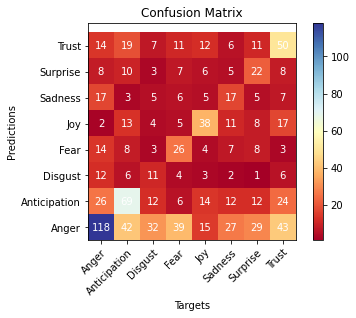

In [68]:
labels = {"Anger": 1, "Anticipation": 2, "Disgust": 3, "Fear": 4, "Joy": 5, 'Sadness' : 6 ,'Surprise':7, 'Trust': 8}
y = np.array(dev["emotion"])
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.RdYlBu)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred_for_lr,dev['emotion']), labels.keys())

## 4.3. SVC 

In [69]:
Xfeatures = train['Cleaned Documents']
ylabels = train['emotion']

In [70]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.0714,random_state=42)

In [72]:
SVC_Model = SVC()
SVC_Model.fit(X_train, y_train)

SVC()

In [73]:
SVC_Model.score(X_test, y_test)

0.349

## 4.3(a) dev Set Prediction  

In [75]:
dev_data = dev['Cleaned Documents']

In [76]:
vect = cv.transform(dev_data)

In [77]:
y_pred_for_SVC= SVC_Model.predict(vect)

In [78]:
y_pred_for_SVC

array([2, 1, 5, 1, 1, 1, 1, 2, 1, 5, 2, 1, 1, 8, 2, 1, 1, 1, 1, 2, 5, 5,
       1, 4, 1, 1, 7, 1, 2, 2, 2, 2, 1, 1, 4, 8, 1, 3, 8, 2, 2, 4, 1, 8,
       1, 2, 2, 1, 5, 1, 1, 2, 5, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 8, 1, 3,
       1, 8, 1, 1, 1, 7, 6, 8, 8, 1, 8, 1, 1, 3, 1, 1, 5, 1, 8, 1, 2, 4,
       1, 1, 2, 8, 1, 1, 1, 1, 4, 1, 1, 1, 1, 8, 1, 1, 1, 1, 2, 2, 7, 7,
       1, 8, 8, 1, 1, 1, 5, 5, 5, 1, 8, 8, 2, 1, 7, 3, 1, 5, 2, 1, 2, 1,
       1, 1, 4, 1, 1, 5, 1, 2, 2, 5, 1, 1, 3, 8, 1, 6, 1, 1, 8, 1, 7, 1,
       1, 2, 3, 5, 5, 1, 6, 2, 4, 5, 7, 8, 2, 6, 1, 1, 2, 1, 2, 1, 1, 6,
       2, 1, 1, 1, 1, 5, 5, 8, 2, 2, 8, 5, 8, 8, 6, 1, 6, 4, 5, 2, 1, 1,
       1, 1, 1, 2, 1, 7, 1, 7, 8, 1, 8, 1, 7, 1, 1, 8, 1, 1, 1, 1, 1, 1,
       1, 1, 7, 7, 2, 1, 1, 6, 1, 1, 8, 8, 2, 1, 1, 5, 7, 8, 1, 8, 4, 1,
       1, 1, 2, 1, 1, 5, 8, 1, 1, 6, 7, 1, 1, 4, 2, 1, 2, 1, 2, 1, 1, 4,
       1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 8, 1, 1, 1, 1, 8, 1, 8,
       1, 8, 1, 8, 1, 6, 8, 6, 1, 7, 5, 2, 1, 8, 7,

In [79]:
SVC_Model.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

## 4.3(b) Model Evaluation 

In [81]:
print(classification_report(dev['emotion'], y_pred_for_SVC))

              precision    recall  f1-score   support

           1       0.30      0.76      0.43       211
           2       0.38      0.34      0.36       170
           3       0.15      0.04      0.06        77
           4       0.32      0.12      0.17       104
           5       0.41      0.35      0.38        97
           6       0.23      0.08      0.12        87
           7       0.33      0.10      0.16        96
           8       0.38      0.27      0.32       158

    accuracy                           0.33      1000
   macro avg       0.31      0.26      0.25      1000
weighted avg       0.32      0.33      0.29      1000



## 4.4. Linear SVC  

In [82]:
Xfeatures = train['Cleaned Documents']
ylabels = train['emotion']

In [83]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.0714,random_state=42)

In [85]:
LinearSVC_Model = LinearSVC()
#pipe = Pipeline([('tfidf' ,TfidfVectorizer()),'model', LinearSVC ])

#pipe = Pipeline(steps=[('tfidf',TfidfVectorizer(sublinear_tf=True, min_df=5,
                       # ngram_range=(1, 2), 
                       # stop_words='english')),('model',LinearSVC())])
LinearSVC_Model.fit(X_train, y_train)

LinearSVC()

In [86]:
LinearSVC_Model.score(X_test, y_test)

0.33

##  4.4(a) dev Set Prediction  

In [87]:
dev_data = dev['Cleaned Documents']

In [88]:
vect = cv.transform(dev_data)

In [89]:
y_pred_for_LinearSVC = LinearSVC_Model.predict(vect)

In [90]:
y_pred_for_LinearSVC

array([2, 4, 5, 3, 1, 2, 1, 3, 4, 5, 1, 6, 1, 8, 7, 1, 1, 1, 1, 2, 5, 5,
       3, 4, 7, 8, 5, 1, 3, 2, 2, 2, 5, 1, 4, 4, 7, 7, 8, 7, 6, 4, 1, 1,
       1, 2, 1, 1, 5, 2, 2, 1, 5, 5, 6, 1, 1, 2, 1, 3, 1, 5, 1, 8, 6, 3,
       8, 2, 1, 8, 7, 7, 6, 7, 8, 2, 8, 1, 2, 5, 2, 1, 5, 5, 8, 4, 2, 6,
       8, 4, 7, 1, 7, 2, 5, 1, 4, 1, 8, 1, 1, 4, 7, 1, 1, 5, 6, 2, 7, 7,
       1, 8, 1, 2, 1, 8, 5, 5, 5, 1, 6, 8, 1, 8, 7, 3, 6, 2, 2, 8, 2, 8,
       8, 1, 4, 1, 1, 2, 1, 3, 2, 2, 5, 4, 8, 8, 1, 6, 1, 5, 3, 1, 7, 1,
       1, 2, 3, 5, 7, 1, 6, 2, 4, 5, 8, 2, 2, 6, 6, 7, 2, 1, 2, 4, 1, 6,
       2, 8, 1, 6, 5, 5, 7, 8, 2, 1, 8, 8, 8, 2, 6, 6, 6, 4, 2, 2, 2, 2,
       1, 7, 1, 2, 1, 3, 1, 7, 8, 2, 8, 5, 7, 3, 7, 8, 1, 4, 2, 7, 1, 3,
       5, 4, 5, 4, 5, 1, 2, 6, 2, 3, 2, 8, 2, 1, 2, 5, 7, 8, 2, 8, 8, 1,
       8, 2, 1, 6, 8, 5, 1, 1, 1, 6, 7, 3, 1, 4, 6, 2, 1, 1, 3, 4, 1, 4,
       1, 6, 4, 2, 8, 1, 1, 6, 6, 1, 2, 2, 1, 3, 8, 1, 1, 1, 1, 8, 3, 8,
       2, 8, 2, 1, 4, 7, 1, 4, 6, 7, 5, 1, 1, 8, 7,

In [91]:
LinearSVC_Model.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

## 4.4(b) Model Evaluation 

In [92]:
print(classification_report(dev['emotion'], y_pred_for_LinearSVC))

              precision    recall  f1-score   support

           1       0.36      0.48      0.41       211
           2       0.34      0.34      0.34       170
           3       0.24      0.18      0.21        77
           4       0.27      0.24      0.26       104
           5       0.38      0.42      0.40        97
           6       0.24      0.24      0.24        87
           7       0.31      0.24      0.27        96
           8       0.31      0.25      0.28       158

    accuracy                           0.32      1000
   macro avg       0.31      0.30      0.30      1000
weighted avg       0.32      0.32      0.32      1000



## 4.5. Random Forest Classifier 

In [93]:
Xfeatures = train['Cleaned Documents']
ylabels = train['emotion']

In [94]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.0714,random_state=42)

In [558]:
RandomForestClassifier_Model = RandomForestClassifier()
RandomForestClassifier_Model.fit(X_train, y_train)

RandomForestClassifier()

In [559]:
RandomForestClassifier_Model.score(X_test, y_test)

0.313

## 4.5(a) dev Set Prediction  

In [122]:
dev_data = test['Cleaned Documents']

In [123]:
vect = cv.transform(dev_data)

In [124]:
y_pred_for_RandomForestClassifier = RandomForestClassifier_Model.predict(vect)

In [125]:
y_pred_for_RandomForestClassifier

array(['Fear', 'Fear', 'Joy', 'Anger', 'Anger', 'Surprise', 'Surprise',
       'Anticipation', 'Surprise', 'Joy', 'Anticipation', 'Joy', 'Anger',
       'Trust', 'Anticipation', 'Anger', 'Anger', 'Anger', 'Anger',
       'Anger', 'Joy', 'Joy', 'Anticipation', 'Fear', 'Anticipation',
       'Anger', 'Surprise', 'Anger', 'Anticipation', 'Trust',
       'Anticipation', 'Anticipation', 'Anger', 'Anticipation', 'Trust',
       'Disgust', 'Joy', 'Disgust', 'Trust', 'Anticipation', 'Fear',
       'Fear', 'Anger', 'Surprise', 'Trust', 'Anticipation',
       'Anticipation', 'Anticipation', 'Joy', 'Joy', 'Anticipation',
       'Anticipation', 'Joy', 'Joy', 'Disgust', 'Trust', 'Anger',
       'Anticipation', 'Surprise', 'Disgust', 'Anger', 'Joy', 'Disgust',
       'Trust', 'Disgust', 'Disgust', 'Anger', 'Sadness', 'Anger',
       'Disgust', 'Anticipation', 'Joy', 'Sadness', 'Trust', 'Trust',
       'Anger', 'Trust', 'Anger', 'Fear', 'Sadness', 'Anticipation',
       'Fear', 'Joy', 'Anger', 'Trust

In [126]:
RandomForestClassifier_Model.classes_

array(['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Trust'], dtype=object)

## 4.5(b) Model Evaluation 

In [127]:
print(classification_report(dev['emotion'], y_pred_for_RandomForestClassifier))

              precision    recall  f1-score   support

       Anger       0.38      0.52      0.44       211
Anticipation       0.31      0.34      0.32       170
     Disgust       0.29      0.13      0.18        77
        Fear       0.25      0.20      0.22       104
         Joy       0.34      0.36      0.35        97
     Sadness       0.25      0.20      0.22        87
    Surprise       0.25      0.26      0.26        96
       Trust       0.32      0.28      0.30       158

    accuracy                           0.32      1000
   macro avg       0.30      0.29      0.29      1000
weighted avg       0.31      0.32      0.31      1000



## 4.6. Decision Tree Classifier 

In [128]:
Xfeatures = train['Cleaned Documents']
ylabels = train['emotion']

In [129]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.0714,random_state=42)

In [131]:
DecisionTreeClassifier_Model = DecisionTreeClassifier()
DecisionTreeClassifier_Model.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
DecisionTreeClassifier_Model.score(X_test, y_test)

0.288

## 4.6(a) dev Set Prediction 

In [133]:
dev_data = test['Cleaned Documents']

In [134]:
vect = cv.transform(dev_data)

In [135]:
y_pred_for_DecisionTreeClassifier = DecisionTreeClassifier_Model.predict(vect)

In [136]:
y_pred_for_DecisionTreeClassifier

array(['Fear', 'Fear', 'Anticipation', 'Anger', 'Anger', 'Surprise',
       'Surprise', 'Fear', 'Anticipation', 'Joy', 'Anticipation',
       'Anticipation', 'Anger', 'Trust', 'Trust', 'Anger', 'Anger',
       'Anger', 'Anger', 'Anger', 'Anticipation', 'Joy', 'Fear',
       'Anticipation', 'Anticipation', 'Anger', 'Surprise', 'Anger',
       'Anticipation', 'Trust', 'Anticipation', 'Anticipation', 'Anger',
       'Anticipation', 'Trust', 'Anticipation', 'Anger', 'Disgust',
       'Trust', 'Anticipation', 'Anticipation', 'Fear', 'Anger', 'Anger',
       'Anger', 'Anticipation', 'Anticipation', 'Anticipation', 'Joy',
       'Anger', 'Anger', 'Sadness', 'Joy', 'Joy', 'Disgust',
       'Anticipation', 'Anger', 'Sadness', 'Anticipation', 'Disgust',
       'Anger', 'Joy', 'Anger', 'Anger', 'Disgust', 'Trust', 'Anger',
       'Sadness', 'Anger', 'Disgust', 'Anticipation', 'Anger', 'Anger',
       'Trust', 'Sadness', 'Anger', 'Trust', 'Anger', 'Fear', 'Disgust',
       'Anger', 'Anger', 'Joy',

In [137]:
DecisionTreeClassifier_Model.classes_

array(['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Trust'], dtype=object)

## 4.6(b) Model Evaluation  

In [138]:
print(classification_report(dev['emotion'], y_pred_for_DecisionTreeClassifier))

              precision    recall  f1-score   support

       Anger       0.33      0.53      0.41       211
Anticipation       0.24      0.28      0.26       170
     Disgust       0.14      0.09      0.11        77
        Fear       0.30      0.21      0.25       104
         Joy       0.38      0.35      0.37        97
     Sadness       0.28      0.23      0.25        87
    Surprise       0.24      0.20      0.22        96
       Trust       0.33      0.23      0.28       158

    accuracy                           0.30      1000
   macro avg       0.28      0.26      0.27      1000
weighted avg       0.29      0.30      0.29      1000



In [139]:

from sklearn.neighbors import KNeighborsClassifier
modelknn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)
modelknn.fit(x_train,y_train)
modelknn.score(X_test, y_test)

0.277

In [140]:
y_pred_for_knn = modelknn.predict(vect)

In [141]:
print(classification_report(dev['emotion'], y_pred_for_knn))

              precision    recall  f1-score   support

       Anger       0.32      0.44      0.37       211
Anticipation       0.25      0.31      0.27       170
     Disgust       0.11      0.05      0.07        77
        Fear       0.17      0.15      0.16       104
         Joy       0.26      0.33      0.29        97
     Sadness       0.23      0.17      0.20        87
    Surprise       0.28      0.20      0.23        96
       Trust       0.25      0.18      0.21       158

    accuracy                           0.26      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.25      0.26      0.25      1000



# tfidf

In [196]:
vect = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
X_vect = vect.fit_transform(Xfeatures)

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X_vect,ylabels,test_size=0.0714,random_state=42)
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

nv_model.score(X_test, y_test)

0.339

In [198]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_model.score(X_test, y_test)

0.341

In [199]:


l_SVC_model = LinearSVC()
l_SVC_model.fit(X_train, y_train)

l_SVC_model.score(X_test, y_test)

0.314

In [200]:
#RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

random_forest_model.score(X_test, y_test)

0.322

In [202]:
DecisionTreeClassifier
#random_forest_model = DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_impurity_decrease=0.02)
DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(X_train, y_train)

DecisionTree_model.score(X_test, y_test)


0.276

In [187]:
Xfeatures = train['Cleaned Documents']
y = train['emotion']
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
X_train1, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10,
                                                    random_state = 42)

In [189]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(),
    SVC(),
    MLPClassifier(random_state = 42),
    KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)
    
]

In [190]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [193]:
features = cv.fit_transform(Xfeatures).toarray()
labels =train['emotion']

entries = [] # it takes 15-20 min to run
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [194]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
DecisionTreeClassifier,0.284643,0.001263
KNeighborsClassifier,0.275429,0.007781
LinearSVC,0.332929,0.007351
LogisticRegression,0.343929,0.006967
MLPClassifier,0.295929,0.001966
MultinomialNB,0.329786,0.006501
RandomForestClassifier,0.214357,0.000160
SVC,0.333071,0.010204


In [96]:
test = pd.read_table("test_set.txt")
test_copy = test

In [97]:
test_copy.head()

,sentence
0,"Come , let's go get that automobile ."
1,"Well , some other time , then ?"
2,He's in trouble . Boy ?
3,Criminal gang unit to take control .
4,By Molto . No discussion . Interview .


In [98]:
cleaned_documents = preprocessing(test_copy)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [99]:
test_copy['Cleaned Documents'] = cleaned_documents

In [100]:
test_copy.head()

,sentence,Cleaned Documents
0,"Come , let's go get that automobile .",come let go get automobile
1,"Well , some other time , then ?",well time
2,He's in trouble . Boy ?,trouble boy
3,Criminal gang unit to take control .,criminal gang unit take control
4,By Molto . No discussion . Interview .,molto discussion interview


In [101]:
test_data = test_copy['Cleaned Documents']

In [102]:
pred_emotion = pipe_lr.predict(test_data)

In [103]:
test['pred emotion'] = pred_emotion

In [104]:
#test_copy.head()
test_copy.drop('Cleaned Documents', axis = 1, inplace = True)


In [105]:
test

,sentence,pred emotion
0,"Come , let's go get that automobile .",2
1,"Well , some other time , then ?",1
2,He's in trouble . Boy ?,1
3,Criminal gang unit to take control .,8
4,By Molto . No discussion . Interview .,1
...,...,...
1995,Let's do some good .,8
1996,"Hey , you're looking good .",5
1997,"Have they moved the embassy , or are you hijac...",1
1998,What that !,1


In [111]:
test_copy.to_csv('test_results.txt', header=['sentence','emotion'], index=None, sep='\t', mode='a')

In [107]:
dev.head()

,sentence,emotion,word_count,Cleaned Documents
0,What happens to the gold in our safe ?,4,9,happens gold safe
1,Natural to get cold feet .,8,6,natural get cold foot
2,"Not very lucky , is he ?",7,7,lucky
3,I'm just a little anxious to get up there and ...,2,17,little anxious get whoop et as
4,Did you think we don't know about your affair ...,1,14,think know affair government official


In [108]:
dev_final = dev[['sentence','emotion']]

In [109]:
dev_final

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1
...,...,...
995,All I ask of you is be careful .,4
996,"You don't like jazz , pal ?",7
997,Put it on .,1
998,Can you ever imagine [PERSON] being in a spot ...,7


In [112]:
dev_final.to_csv('dev_results.txt', header=['sentence','emotion'], index=None, sep='\t', mode='a')